In [ ]:
#23MAI1015
#23MAI1023

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/waether_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/waether_dataset/test.csv.gsheet
/content/drive/MyDrive/waether_dataset/alien_test/foggy_10.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_7.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_5.jpg
/content/drive/MyDrive/waether_dataset/alien_test/Cloud_2.jpg
/content/drive/MyDrive/waether_dataset/alien_test/Cloud_4.jpg
/content/drive/MyDrive/waether_dataset/alien_test/Cloud_1.png
/content/drive/MyDrive/waether_dataset/alien_test/rain_2.png
/content/drive/MyDrive/waether_dataset/alien_test/foggy_6.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_3.jpg
/content/drive/MyDrive/waether_dataset/alien_test/rain_3.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_4.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_9.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_2.jpg
/content/drive/MyDrive/waether_dataset/alien_test/rain_1.jpg
/content/drive/MyDrive/waether_dataset/alien_test/foggy_8.jpg
/content/drive/My

In [ ]:
root_dir = "/content/drive/MyDrive/waether_dataset"
os.listdir(root_dir)

['alien_test',
 'foggy',
 'cloudy',
 'sunrise',
 'shine',
 'rainy',
 'test.csv.gsheet']

In [ ]:
df_cloudy = "/content/drive/MyDrive/waether_dataset/cloudy"
df_foggy = "/content/drive/MyDrive/waether_dataset/foggy"
df_rainy = "/content/drive/MyDrive/waether_dataset/rainy"
df_shine = "/content/drive/MyDrive/waether_dataset/shine"
df_sunrise = "/content/drive/MyDrive/waether_dataset/sunrise"

In [ ]:
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(df_foggy))}")
print(f"Sunrise: {len(os.listdir(df_sunrise))}")
print(f"Shine: {len(os.listdir(df_shine))}")
print(f"Rainy: {len(os.listdir(df_rainy))}")
print(f"Cloudy: {len(os.listdir(df_cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [ ]:
x = []
y = []
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [ ]:
x,y= create_dataset(df_foggy,"foggy")
x,y= create_dataset(df_sunrise,"sunrise")
x,y= create_dataset(df_shine,"shine")
x,y= create_dataset(df_rainy,"rainy")
x,y= create_dataset(df_cloudy,"cloudy")

100%|██████████| 300/300 [00:01<00:00, 197.60it/s]


In [ ]:
x =  np.array(x)
y = np.array(y)
x.shape,y.shape

((1498, 150, 150, 3), (1498,))

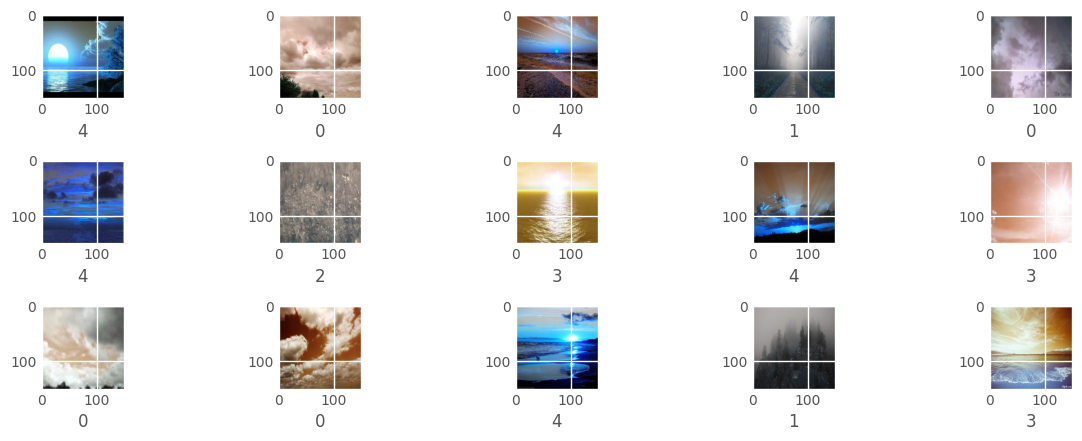

In [ ]:
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(x)))
    image = x[sample]
    category = y[sample]
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [ ]:
y_train_lb.shape,y_test_lb.shape

((1198, 5), (300, 5))

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights = "imagenet",include_top=False,input_shape=(img_size,img_size,3))

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model =Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(5,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 5)                 40965     
                                                                 
Total params: 20065349 (76.54 MB)
Trainable params: 40965 (160.02 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,verbose=1)

In [ ]:
unique,counts = np.unique(y_train_lb,return_counts=True)
print(unique,counts)

[0 1] [4792 1198]


In [ ]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=15,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
38/38 [==============================] - ETA: 0s - loss: 0.4604 - accuracy: 0.8556
Epoch 1: val_accuracy improved from -inf to 0.86000, saving model to vgg19.h5
38/38 [==============================] - 491s 13s/step - loss: 0.4604 - accuracy: 0.8556 - val_loss: 0.4546 - val_accuracy: 0.8600
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.9115
Epoch 2: val_accuracy improved from 0.86000 to 0.86333, saving model to vgg19.h5
38/38 [==============================] - 413s 11s/step - loss: 0.3296 - accuracy: 0.9115 - val_loss: 0.4329 - val_accuracy: 0.8633
Epoch 3/15
38/38 [==============================] - ETA: 0s - loss: 0.2710 - accuracy: 0.9274
Epoch 3: val_accuracy improved from 0.86333 to 0.89000, saving model to vgg19.h5
38/38 [==============================] - 422s 11s/step - loss: 0.2710 - accuracy: 0.9274 - val_loss: 0.3720 - val_accuracy: 0.8900
Epoch 4/15
38/38 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9491
Epoch 4: val_accuracy did not improve from 0.89000
38/38 [==============================] - 472s 13s/step - loss: 0.2117 - accuracy: 0.9491 - val_loss: 0.3681 - val_accuracy: 0.8833
Epoch 5/15
38/38 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.9591
Epoch 5: val_accuracy did not

In [ ]:
loss,accuracy = model.evaluate(x_test,y_test_lb)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10/10 [==============================] - 82s 8s/step - loss: 0.3070 - accuracy: 0.8967
Loss: 0.30696311593055725
Accuracy: 0.8966666460037231


In [ ]:
y_pred = np.argmax(model.predict(x_test),axis=1)
y_pred[:15]

10/10 [==============================] - 83s 8s/step


array([2, 0, 0, 0, 3, 3, 2, 3, 4, 1, 3, 3, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        60
           1       0.90      0.77      0.83        56
           2       0.88      0.93      0.90        71
           3       0.89      0.91      0.90        45
           4       0.96      0.96      0.96        68

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.90      0.90       300



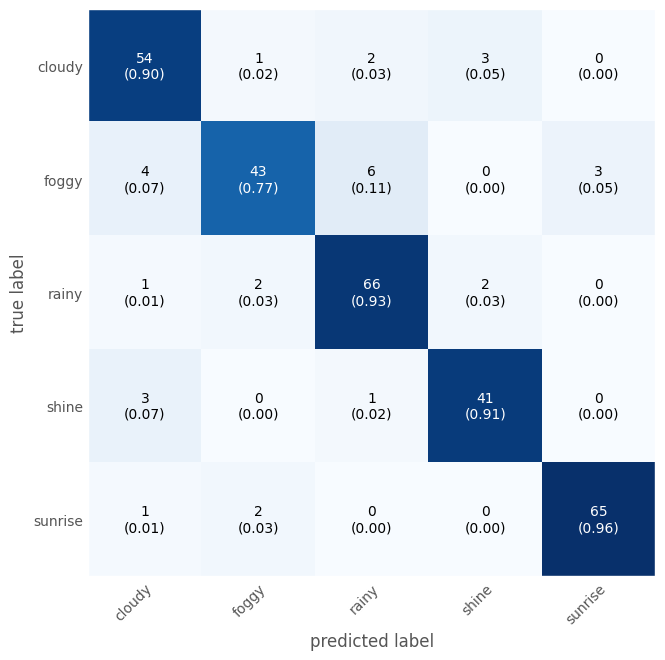

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["cloudy","foggy","rainy","shine","sunrise"],
                      show_normed = True);

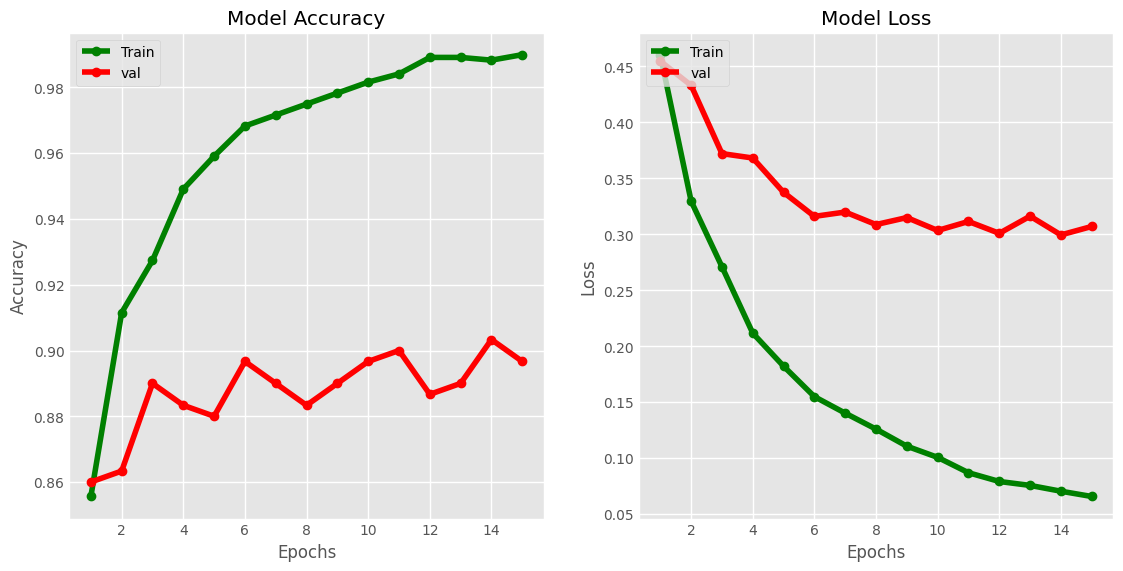

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

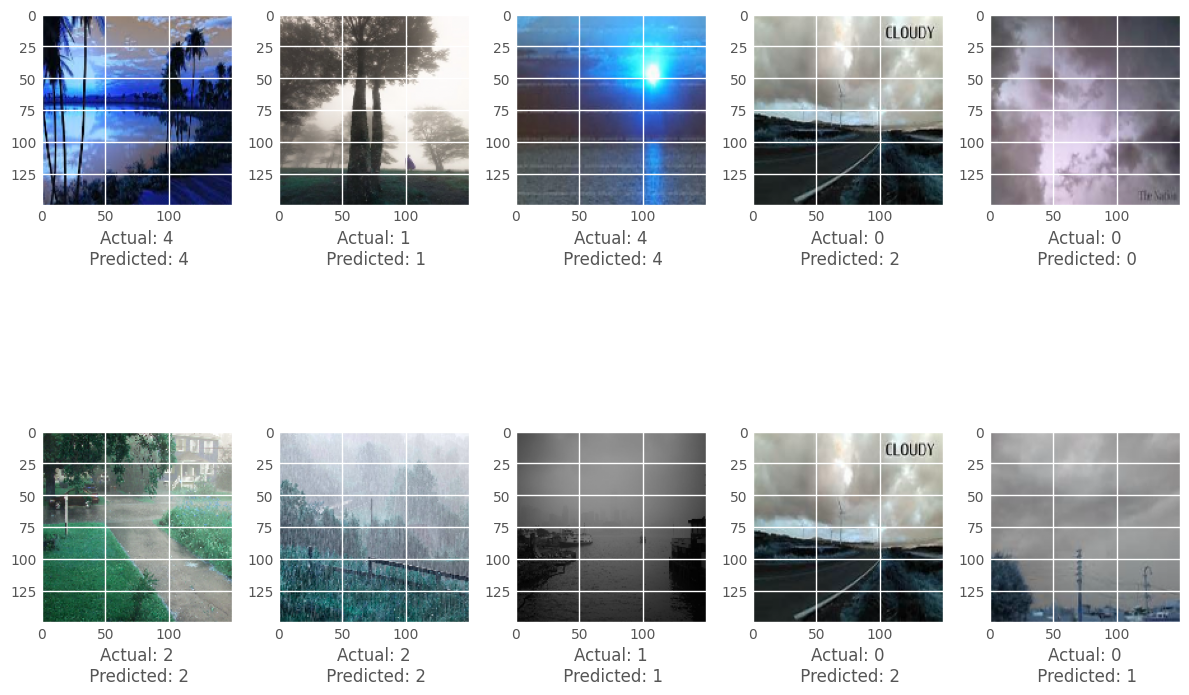

In [ ]:
plt.figure(figsize=(12,9))
plt.style.use("ggplot")
for i in range(10):
    sample = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.imshow(x_test[sample])
    plt.xlabel(f"Actual: {y_test[sample]}\n Predicted: {y_pred[sample]}")

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib as pyplot

1/1 [==============================] - 0s 269ms/step


0

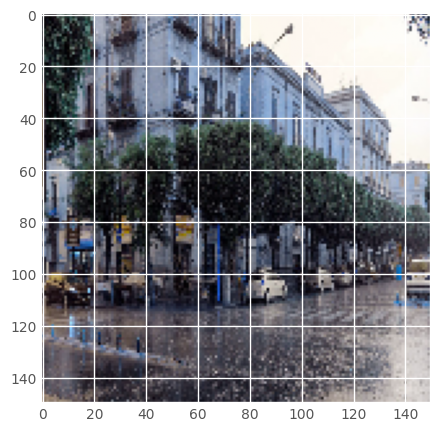

In [ ]:
res = model.predict(x_test[200:201])
ind = np.argmax(res)
plt.imshow(x_test[200])
y_pred[ind]